## Total Questions

In [37]:
# 1 How do sales vary across different regions?
# 2 What's the distribution of order quantities?
# 3 How do sales trend over time? 
# 4 What's the breakdown of sales by product category?
# 5 How does profit correlate with sales? 
# 6 What's the comparison of average discount across different product categories? 
# 7 How does the shipment mode distribution look?
# 8 What's the customer segment distribution?
# 9 How do sales and profit vary by month? 
# 10 What's the relationship between quantity ordered and discount offered? 
# 11 How does the average shipping time vary by ship mode?

## Building connection with python to sql database

In [38]:
import pymysql
import pandas as pd

conn = pymysql.connect(
    host="localhost",
    user="root",
    password="Jenil1234",
    database="ecomm"
)
cursor = conn.cursor()

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#BASIC QUERY STRUCTURE 

# query = "SELECT * FROM ecomm.superstore;"
# cursor.execute(query)

# # Fetch all rows
# rows = cursor.fetchall()

## 1 - How do sales vary across different regions?  

In [41]:
query = """ select superstore.Region , sum(superstore.Sales) as total_sales 
from superstore 
group by superstore.Region
order by total_sales """ 

cursor.execute(query)

# Fetch all rows
rows = cursor.fetchall()

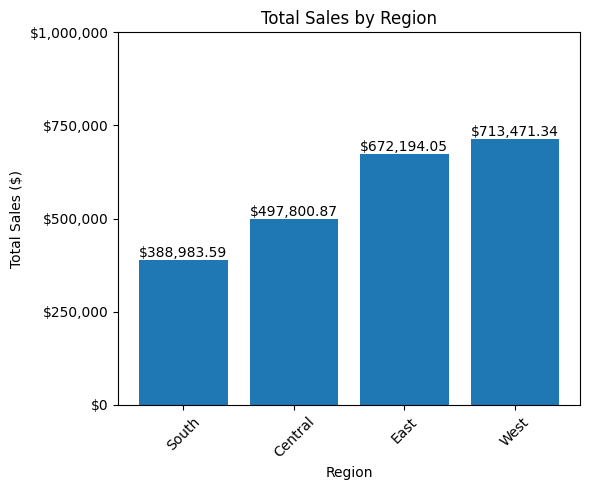

In [15]:
import matplotlib.pyplot as plt

# Assuming 'rows' contains your query results
regions = [row[0] for row in rows]  # Extract region names
sales = [row[1] for row in rows]    # Extract total sales

# Create the bar chart
plt.figure(figsize=(6, 5))
plt.bar(regions, sales)

# Customize the chart
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')

# Add value labels on top of each bar
for i, v in enumerate(sales):
    plt.text(i, v, f'${v:,.2f}', ha='center', va='bottom')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

plt.yticks([0, 250000, 500000, 750000, 1000000],
           ['$0', '$250,000', '$500,000', '$750,000', '$1,000,000'])


# Adjust layout and display the chart
plt.tight_layout()
plt.show()

## 2 - What's the distribution of order quantities?

In [5]:
query = """ WITH b AS (
  SELECT 
    `Order ID` AS customers,
    ROUND(AVG(Quantity), 0) AS avg_order
  FROM superstore
  GROUP BY `Order ID`
)
SELECT
  avg_order,
  COUNT(customers) AS count_customers
FROM b
GROUP BY avg_order
order by count_customers desc; """

cursor.execute(query)

rows = cursor.fetchall()

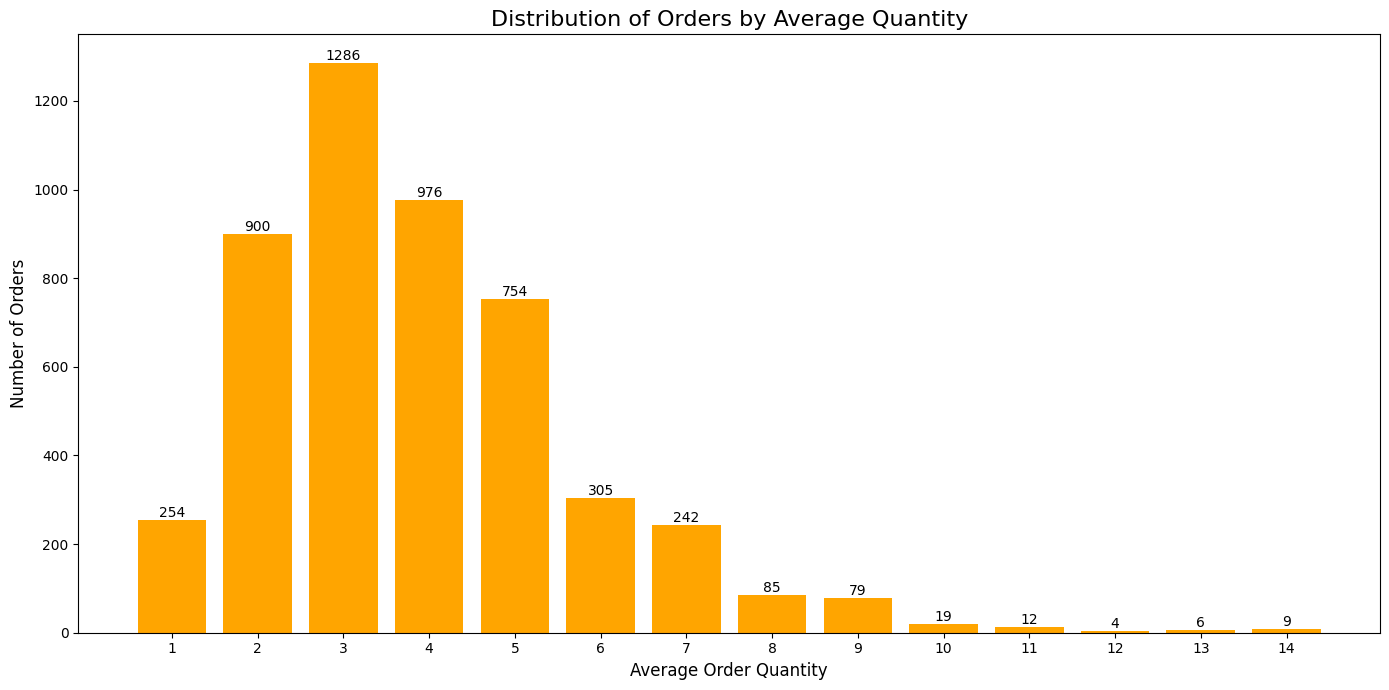

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'rows' contains the result of your SQL query
# Convert the result to a pandas DataFrame
df = pd.DataFrame(rows, columns=['avg_order', 'count_customers'])

# Ensure 'avg_order' is of integer type
df['avg_order'] = df['avg_order'].astype(int)

# Create a range of all possible avg_order values from 1 to 14
all_avg_orders = np.arange(1, 15)

# Create a new DataFrame with all possible avg_order values
df_full = pd.DataFrame({'avg_order': all_avg_orders})

# Merge with the original data, filling missing values with 0
df_merged = df_full.merge(df, on='avg_order', how='left')
df_merged['count_customers'] = df_merged['count_customers'].fillna(0).astype(int)

# Sort the DataFrame by avg_order
df_sorted = df_merged.sort_values('avg_order')

# Create the plot
plt.figure(figsize=(14, 7))

# Bar plot
plt.bar(df_sorted['avg_order'], df_sorted['count_customers'] , color="orange")

# Customize the plot
plt.title('Distribution of Orders by Average Quantity', fontsize=16)
plt.xlabel('Average Order Quantity', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Set x-axis ticks to show all values from 1 to 14
plt.xticks(range(1, 15))

# Add value labels on top of each bar
for i, v in enumerate(df_sorted['count_customers']):
    plt.text(df_sorted['avg_order'].iloc[i], v, str(v), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

## 3 - How Do Sales Trend Over Time ? 

In [8]:
query = """ SELECT 
  YEAR(STR_TO_DATE(superstore.`Order Date`, '%m/%d/%Y')) AS order_year,
  ROUND(AVG(superstore.Sales),2) AS avg_sales
FROM superstore 
GROUP BY YEAR(STR_TO_DATE(superstore.`Order Date`, '%m/%d/%Y'))
ORDER BY order_year; """

cursor.execute(query) 

rows = cursor.fetchall()

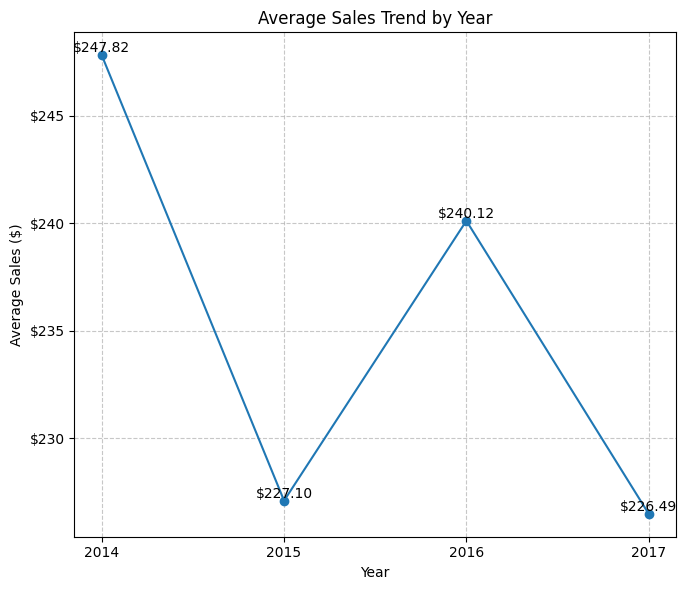

In [10]:
import matplotlib.pyplot as plt

# Assuming 'rows' contains your query results
years = [row[0] for row in rows]
avg_sales = [row[1] for row in rows]

plt.figure(figsize=(7, 6))
plt.plot(years, avg_sales, marker='o')  # 'o' adds circular markers at each data point

plt.title('Average Sales Trend by Year')
plt.xlabel('Year')
plt.ylabel('Average Sales ($)')

# Format y-axis ticks as currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add value labels for each point
for i, v in enumerate(avg_sales):
    plt.text(years[i], v, f'${v:,.2f}', ha='center', va='bottom')

# Ensure x-axis shows all years
plt.xticks(years)

plt.grid(True, linestyle='--', alpha=0.7)  # Add a light grid
plt.tight_layout()
plt.show()

## 4 - What's the breakdown of sales by product category? 

In [11]:
query = """ select superstore.Category , 
round(sum(superstore.Sales),2) as total_sales ,
round((sum(superstore.Sales) / (select sum(superstore.Sales) from superstore)) * 100,2 ) as Percentage
from superstore
group by superstore.Category
order by total_sales ; """

cursor.execute(query)

rows = cursor.fetchall()

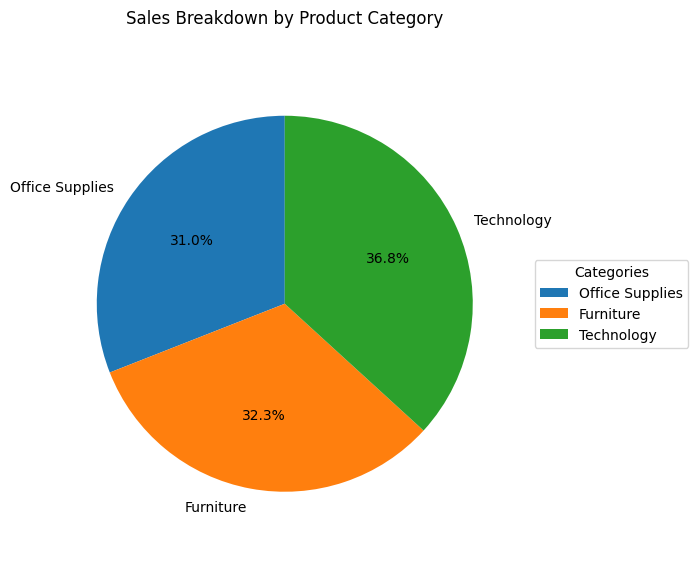

In [16]:
import matplotlib.pyplot as plt

# Extract data from rows
categories = [row[0] for row in rows]
sales = [row[1] for row in rows]
percentages = [row[2] for row in rows]

# Create pie chart
plt.figure(figsize=(7, 6))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=90)
plt.title('Sales Breakdown by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend
plt.legend(title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

## 5 - How does profit correlate with sales?

In [17]:
query = """ SELECT 
    superstore.`Sub-Category`,
    ROUND(SUM(Sales), 2) AS Total_Sales,
    ROUND(SUM(Profit), 2) AS Total_Profit,
    ROUND((SUM(Profit) / SUM(Sales)) * 100, 2) AS Profit_Margin_Percentage
FROM 
    superstore
WHERE 
    Sales > 0
GROUP BY 
    superstore.`Sub-Category`
ORDER BY 
    Profit_Margin_Percentage DESC 
LIMIT 5;
 """

cursor.execute(query)

rows = cursor.fetchall()

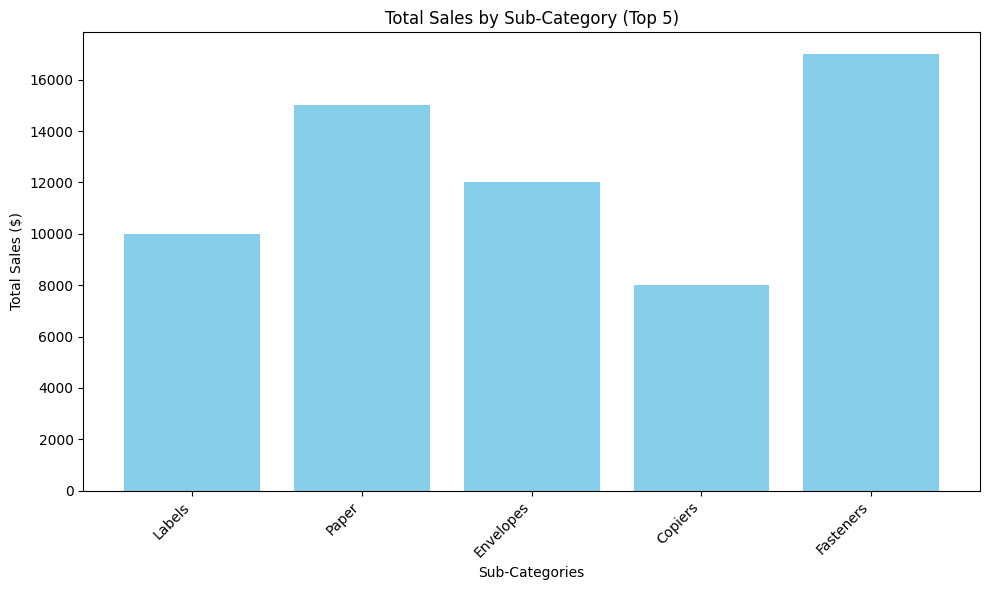

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Example data from the query result
rows = [
    ("Labels", 10000, 2000, 20.00),
    ("Paper", 15000, 3000, 20.00),
    ("Envelopes", 12000, 1800, 15.00),
    ("Copiers", 8000, 1600, 20.00),
    ("Fasteners", 17000, 3400, 20.00)
]

# Extract data from rows
sub_categories = [row[0] for row in rows]
total_sales = [row[1] for row in rows]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(sub_categories, total_sales, color='skyblue')

# Customize the chart
plt.xlabel('Sub-Categories')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Sub-Category (Top 5)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## 6 -What's the comparison of average discount across different product categories? 

In [3]:
query = """ SELECT 
    superstore.`Category` as category,
    ROUND(AVG(superstore.`Discount`) * 100, 3) as avg_percentage_discount
FROM 
    superstore
GROUP BY 
    superstore.`Category`
ORDER BY 
    avg_percentage_discount DESC;
    """
cursor.execute(query)

rows = cursor.fetchall()

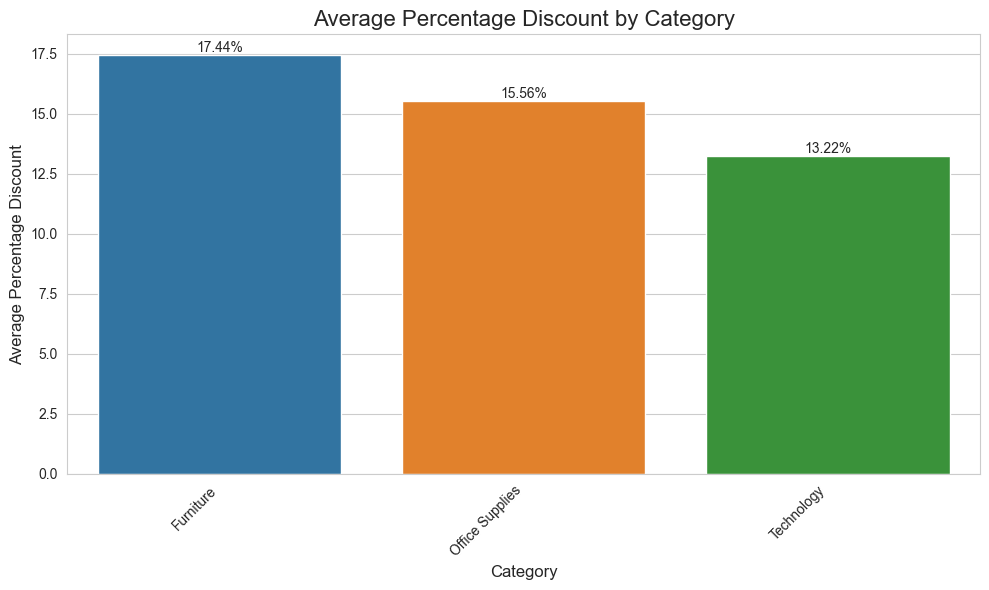

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the query results to a pandas DataFrame
df = pd.DataFrame(rows, columns=['Category', 'Avg_Percentage_Discount'])

# Set up the plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the bar plot with updated parameters
ax = sns.barplot(x='Category', y='Avg_Percentage_Discount', data=df, hue='Category', legend=False)

# Customize the color palette
sns.color_palette("viridis", n_colors=len(df))

# Customize the plot
plt.title('Average Percentage Discount by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Percentage Discount', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(df['Avg_Percentage_Discount']):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

## 7 - Calculate percentage of orders as using different ship mode?

In [6]:
query = """ 
SELECT 
    superstore.`Ship Mode`,
    COUNT(superstore.`Order ID`) as total_orders,
    ROUND(COUNT(superstore.`Order ID`) * 100.0 / SUM(COUNT(superstore.`Order ID`)) OVER(), 2) as percentage
FROM 
    superstore
GROUP BY 
    superstore.`Ship Mode`
ORDER BY 
    total_orders;
    """

cursor.execute(query)
rows = cursor.fetchall()

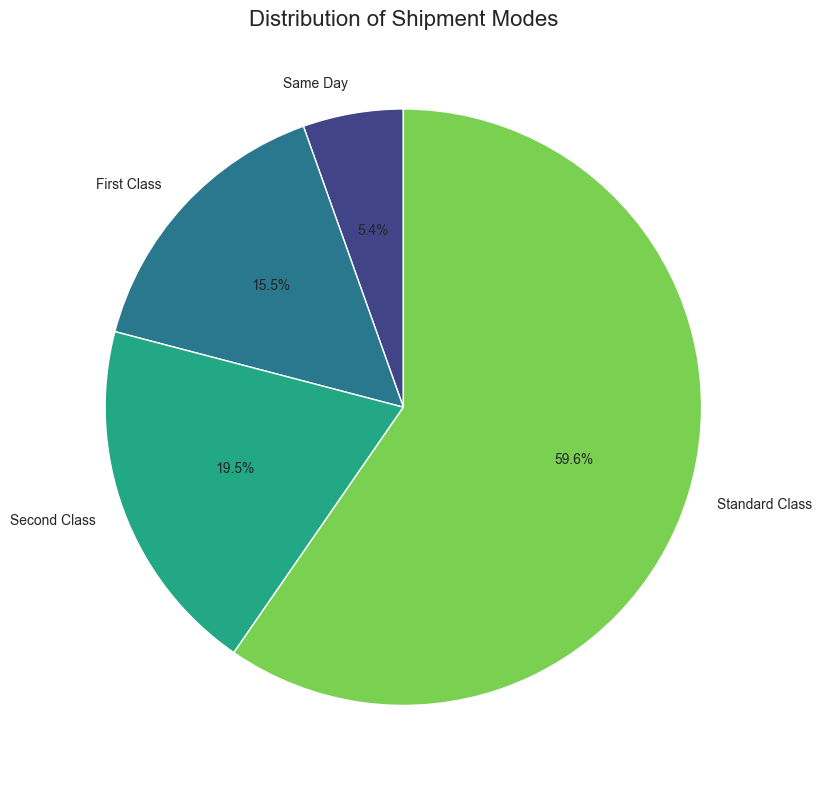

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the query results to a pandas DataFrame
df = pd.DataFrame(rows, columns=['Ship_Mode', 'Total_Orders', 'Percentage'])

# Set up the plot
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Create color palette
colors = sns.color_palette('viridis', n_colors=len(df))

# Create the pie chart
plt.pie(df['Percentage'], labels=df['Ship_Mode'], colors=colors, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Distribution of Shipment Modes', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## 8 -  How do sales and profit vary by month?

In [11]:
query = """ 
SELECT 
    MONTH(STR_TO_DATE(`Order Date`, '%m/%d/%Y')) as month,
    round(sum(superstore.`Sales`),2) as sales,
    round(sum(superstore.`Profit`),2) as profit
FROM
    superstore
group by MONTH(STR_TO_DATE(`Order Date`, '%m/%d/%Y'))
ORDER BY sales, profit;
    """
cursor.execute(query)

rows = cursor.fetchall()

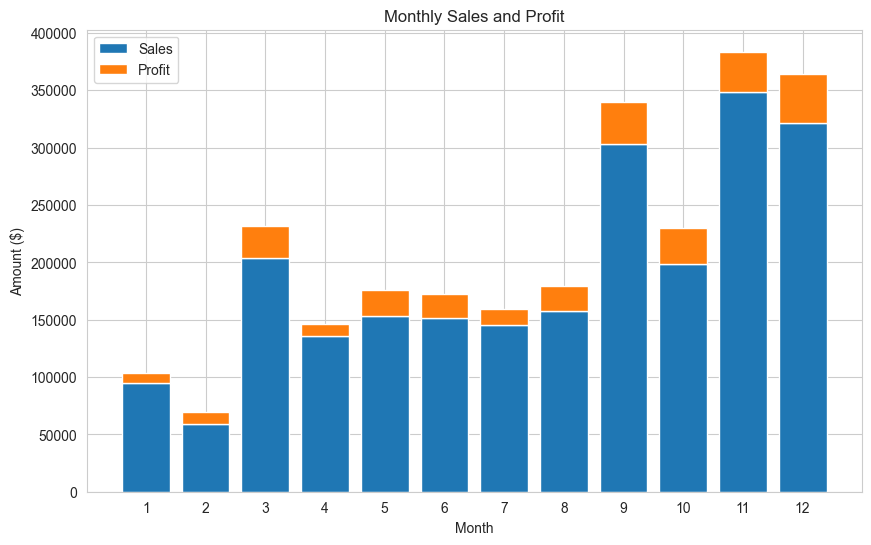

In [13]:
# Convert fetched data to DataFrame
columns = ['month', 'sales', 'profit']
df = pd.DataFrame(rows, columns=columns)

# Close the cursor and connection
cursor.close()

# Ensure the month column is integer type
df['month'] = df['month'].astype(int)

# Sort the DataFrame by month
df = df.sort_values(by='month')

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(df['month'], df['sales'], label='Sales')
ax.bar(df['month'], df['profit'], bottom=df['sales'], label='Profit')

ax.set_xlabel('Month')
ax.set_ylabel('Amount ($)')
ax.set_title('Monthly Sales and Profit')
ax.legend()

plt.xticks(df['month'])
plt.show()

## 9 - What's the relationship between quantity ordered and discount offered?

In [22]:
query = """ 
select 
	superstore.`Quantity`,
    round(avg(superstore.`Discount`) * 100,2) as percen_avg_discount
    from
    superstore
    group by superstore.`Quantity`
    order by percen_avg_discount;
    """
cursor.execute(query)

rows = cursor.fetchall()

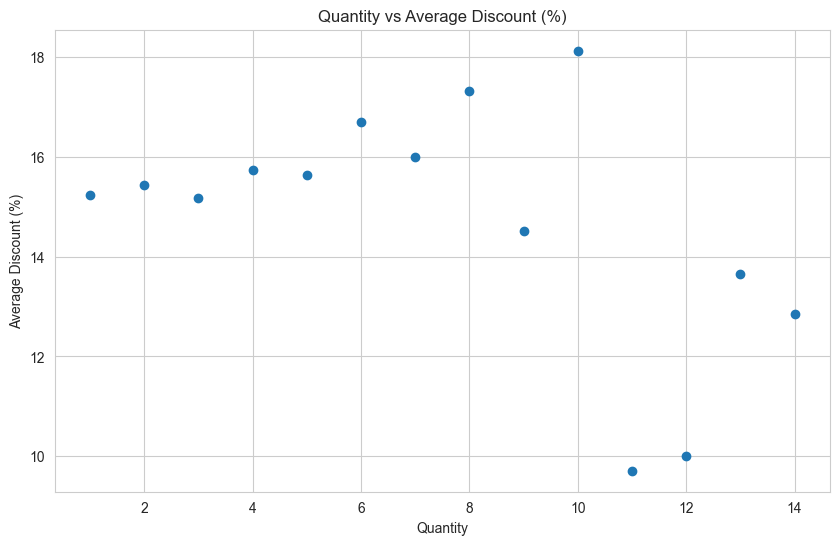

In [23]:
# Define the column names
columns = ['Quantity', 'PercentAvgDiscount']

# Convert the fetched data to a DataFrame
df = pd.DataFrame(rows, columns=columns)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['PercentAvgDiscount'])

# Add labels and title
plt.xlabel('Quantity')
plt.ylabel('Average Discount (%)')
plt.title('Quantity vs Average Discount (%)')

# Show the plot
plt.show()

## 10 -  How does the average shipping time vary by ship mode? 

In [24]:
query = """
SELECT 
    `Ship Mode`,
    round(AVG(time_to_deliver),0) AS avg_time_to_deliver
FROM (
    SELECT 
        `Ship Mode`,
        DATEDIFF(
            DATE(STR_TO_DATE(`Ship Date`, '%m/%d/%Y')),
            DATE(STR_TO_DATE(`Order Date`, '%m/%d/%Y'))
        ) AS time_to_deliver
    FROM
        superstore
) AS subquery
GROUP BY
    `Ship Mode`;
    """

cursor.execute(query)

rows = cursor.fetchall()

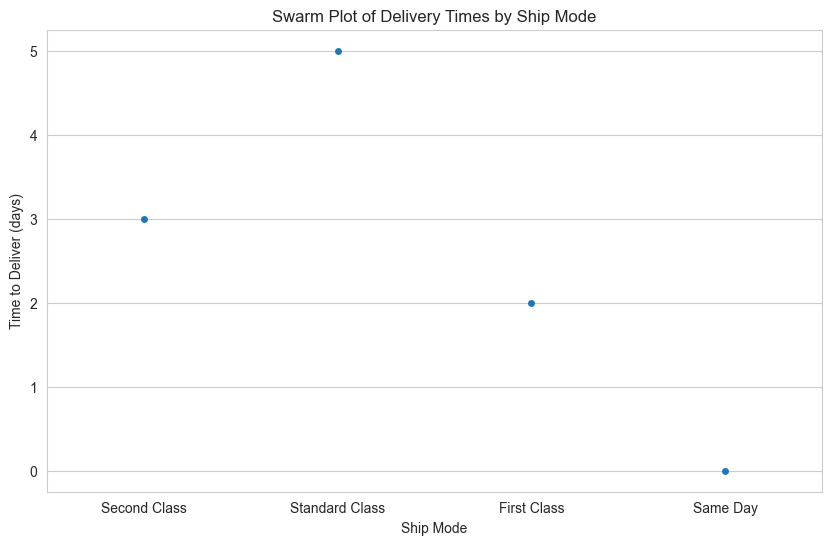

In [28]:
# Define the column names
columns = ['Ship Mode', 'Time to Deliver']

# Convert the fetched data to a DataFrame
df = pd.DataFrame(rows, columns=columns)

plt.figure(figsize=(10, 6))
sns.swarmplot(x='Ship Mode', y='Time to Deliver', data=df)

# Add labels and title
plt.xlabel('Ship Mode')
plt.ylabel('Time to Deliver (days)')
plt.title('Swarm Plot of Delivery Times by Ship Mode')

# Show the plot
plt.show()

